In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy

In [2]:
dataset = pd.read_csv('../../Phase1/DataSets/apdra_dataset.csv')

x = pd.DataFrame(dataset.iloc[:, 0:3].values)
y = dataset.iloc[:, 3].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 123)

# Splitting the training data, one set will be used for training the emperical models and the other set will be used for KBNN

x_emp, x_kbnn, y_emp, y_kbnn = train_test_split(x_train, y_train, test_size = 0.4)   


In [3]:
from sklearn.neighbors import KNeighborsRegressor

emp = KNeighborsRegressor(n_neighbors=5)
 
emp.fit(x_emp, y_emp)

KNeighborsRegressor()

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mean_squared_error(y_kbnn,emp.predict(x_kbnn))


0.4211149581705253

In [5]:
r2_score(y_kbnn,emp.predict(x_kbnn))

0.9888921493158145

In [6]:

# KBNN

import keras
from keras.models import Sequential
from keras.layers import Dense

# Artificial NN

classifier = Sequential()

# Input Layer
classifier.add(Dense(units = 6, activation = 'relu', input_dim = 3))

# 1st Hidden Layer
classifier.add(Dense(units = 8, activation = 'relu'))

# 2nd Hidden Layer
classifier.add(Dense(units = 3, activation = 'relu'))

# Output Layer
classifier.add(Dense(units = 1, activation = 'linear'))


In [7]:
# Training

classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

history=classifier.fit(x_kbnn, y_kbnn-emp.predict(x_kbnn), batch_size = 10, epochs = 100, validation_data = (x_test, y_test-emp.predict(x_test)))

Epoch 1/100
1312/1312 [==============================] - 4s 2ms/step - loss: 0.4505 - accuracy: 0.0000e+00 - val_loss: 0.3690 - val_accuracy: 0.0000e+00
Epoch 2/100
1312/1312 [==============================] - 3s 2ms/step - loss: 0.4302 - accuracy: 0.0000e+00 - val_loss: 0.3687 - val_accuracy: 0.0000e+00
Epoch 3/100
1312/1312 [==============================] - 3s 2ms/step - loss: 0.4282 - accuracy: 0.0000e+00 - val_loss: 0.3687 - val_accuracy: 0.0000e+00
Epoch 4/100
1312/1312 [==============================] - 3s 2ms/step - loss: 0.4266 - accuracy: 0.0000e+00 - val_loss: 0.3691 - val_accuracy: 0.0000e+00
Epoch 5/100
1312/1312 [==============================] - 3s 2ms/step - loss: 0.4264 - accuracy: 0.0000e+00 - val_loss: 0.3710 - val_accuracy: 0.0000e+00
Epoch 6/100
1312/1312 [==============================] - 2s 2ms/step - loss: 0.4238 - accuracy: 0.0000e+00 - val_loss: 0.3696 - val_accuracy: 0.0000e+00
Epoch 7/100
1312/1312 [==============================] - 2s 2ms/step - loss: 0.423

1312/1312 [==============================] - 2s 2ms/step - loss: 0.4212 - accuracy: 0.0000e+00 - val_loss: 0.3674 - val_accuracy: 0.0000e+00
Epoch 55/100
1312/1312 [==============================] - 3s 2ms/step - loss: 0.4213 - accuracy: 0.0000e+00 - val_loss: 0.3675 - val_accuracy: 0.0000e+00
Epoch 56/100
1312/1312 [==============================] - 3s 2ms/step - loss: 0.4212 - accuracy: 0.0000e+00 - val_loss: 0.3679 - val_accuracy: 0.0000e+00
Epoch 57/100
1312/1312 [==============================] - 3s 2ms/step - loss: 0.4212 - accuracy: 0.0000e+00 - val_loss: 0.3677 - val_accuracy: 0.0000e+00
Epoch 58/100
1312/1312 [==============================] - 2s 2ms/step - loss: 0.4213 - accuracy: 0.0000e+00 - val_loss: 0.3678 - val_accuracy: 0.0000e+00
Epoch 59/100
1312/1312 [==============================] - 2s 2ms/step - loss: 0.4212 - accuracy: 0.0000e+00 - val_loss: 0.3676 - val_accuracy: 0.0000e+00
Epoch 60/100
1312/1312 [==============================] - 2s 2ms/step - loss: 0.4212 - ac

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

y_pred = classifier.predict(x_test)[0] + emp.predict(x_test)

mean_squared_error(y_test,y_pred)
r2_score(y_test, y_pred)

print(mean_squared_error(y_test,y_pred))

0.3679779928242555


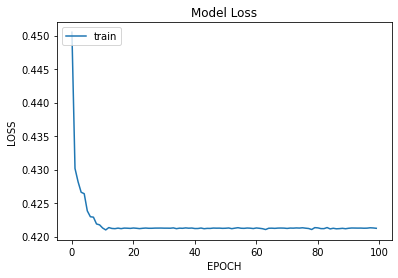

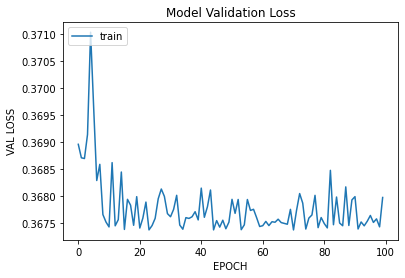

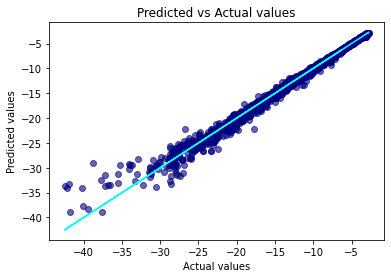

In [9]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('VAL LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

def generatePredictionPlot(y_pred, y_test):
    plt.scatter(x=y_test, y=y_pred, c='navy', alpha=0.6)
    plt.plot(y_test, y_test,color='cyan')
    plt.title('Predicted vs Actual values')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()
    
generatePredictionPlot(y_pred, y_test)

In [10]:
r2_score(y_test,y_pred)

0.9903202621767339